In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = 'C:\\Users\\hksingh\\Documents\\AIDeepDive\\'

In [240]:
import seaborn as sns

In [241]:
df1 = pd.read_csv(path+'SPTSXComposite.csv', index_col='Ticker')
print(df1.shape)
df1.head()

(132, 5)


,Name,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector
Ticker,,,,,
NYSE:AEM,Agnico Eagle Mines Limited (NYSE:AEM),10715.5,2990.0,5.0,Materials
TSX:AC,Air Canada (TSX:AC),19197.0,18065.0,5.0,Industrials
TSX:AGI,Alamos Gold Inc. (TSX:AGI),4455.5,889.4,4.0,Materials
TSX:AQN,Algonquin Power & Utilities Corp. (TSX:AQN),12811.6,2247.9,2.0,Utilities
TSX:ATD.B,Alimentation Couche-Tard Inc. (TSX:ATD.B),30426.3,79562.8,3.0,Consumer Staples


In [242]:
df2 = pd.read_csv(path+'SPTSXCap_Employees.csv', index_col='Ticker')
print(df2.shape)
df2.head()

(142, 3)


,Name,MarketCapitalization,NumberEmployees
Ticker,,,
NYSE:AEM,Agnico Eagle Mines Limited (NYSE:AEM),15892.5,5990.0
TSX:AC,Air Canada (TSX:AC),11338.6,32600.0
TSX:AGI,Alamos Gold Inc. (TSX:AGI),3151.9,1700.0
TSX:AQN,Algonquin Power & Utilities Corp. (TSX:AQN),8000.0,2277.0
TSX:ATD.B,Alimentation Couche-Tard Inc. (TSX:ATD.B),47281.4,133000.0


In [243]:
df2.loc[df2.duplicated()]

,Name,MarketCapitalization,NumberEmployees
Ticker,,,
TSX:ACB,Aurora Cannabis Inc. (TSX:ACB),8958.5,967.0
TSX:BTO,B2Gold Corp. (TSX:BTO),4105.6,3168.0
NasdaqGS:OTEX,Open Text Corporation (NasdaqGS:OTEX),14905.9,13100.0
TSX:PAAS,Pan American Silver Corp. (TSX:PAAS),3565.0,4530.0
TSX:PXT,Parex Resources Inc. (TSX:PXT),3129.7,279.0
TSX:TSGI,The Stars Group Inc. (TSX:TSGI),6113.9,4516.0
TSX:TD,The Toronto-Dominion Bank (TSX:TD),139949.9,87999.0
TSX:EMA,Emera Incorporated (TSX:EMA),12873.1,7523.0
TSX:EMP.A,Empire Company Limited (TSX:EMP.A),9112.5,123000.0


In [244]:
df2 = df2.drop_duplicates(keep='first')
print(df2.shape)

(132, 3)


In [245]:
df3 = pd.read_csv(path+'SP_Transactions.csv')
print(df3.shape)
df3.head()

(4896, 4)


,Date,Ticker,TransactionType,TransactionValue
0,03/08/2016,TSX:AAV,Public Offering,87.54
1,11/29/2018,TSX:ADVZ,Shelf Registration,185.40
2,09/06/2018,TSX:ADVZ,Private Placement,775.11
3,10/06/2016,TSX:ADVZ,Public Offering,462.65
4,09/26/2018,TSX:ARE,Public Offering,160.00


In [246]:
df4 = df3.groupby(['Ticker']).sum().round(1)
df4.head()

,TransactionValue
Ticker,
AMEX:GTE,826.5
NYSE:AEM,1607.4
NYSE:BHC,13076.1
NYSE:MUX,177.5
NYSE:RBA,662.2


In [247]:
df4.columns = ['TotalTransactions']
df4.columns

Index(['TotalTransactions'], dtype='object')

In [248]:
df5 = df3.groupby(['Ticker']).mean().round(1)
df5.head()

,TransactionValue
Ticker,
AMEX:GTE,206.6
NYSE:AEM,401.8
NYSE:BHC,1452.9
NYSE:MUX,35.5
NYSE:RBA,331.1


In [249]:
df5.columns = ['AverageTransactions']
df5.columns

Index(['AverageTransactions'], dtype='object')

In [250]:
df6= pd.merge(df4,df5,on='Ticker',how='inner')
df6.head()

,TotalTransactions,AverageTransactions
Ticker,,
AMEX:GTE,826.5,206.6
NYSE:AEM,1607.4,401.8
NYSE:BHC,13076.1,1452.9
NYSE:MUX,177.5,35.5
NYSE:RBA,662.2,331.1


In [251]:
df6.shape

(366, 2)

In [252]:
DF_T=pd.merge(df1,df2,on='Ticker',how='inner')
DF=pd.merge(DF_T,df6,on='Ticker',how='left')
DF.head()

,Name_x,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector,Name_y,MarketCapitalization,NumberEmployees,TotalTransactions,AverageTransactions
Ticker,,,,,,,,,,
NYSE:AEM,Agnico Eagle Mines Limited (NYSE:AEM),10715.5,2990.0,5.0,Materials,Agnico Eagle Mines Limited (NYSE:AEM),15892.5,5990.0,1607.4,401.8
TSX:AC,Air Canada (TSX:AC),19197.0,18065.0,5.0,Industrials,Air Canada (TSX:AC),11338.6,32600.0,200.0,200.0
TSX:AGI,Alamos Gold Inc. (TSX:AGI),4455.5,889.4,4.0,Materials,Alamos Gold Inc. (TSX:AGI),3151.9,1700.0,340.1,170.1
TSX:AQN,Algonquin Power & Utilities Corp. (TSX:AQN),12811.6,2247.9,2.0,Utilities,Algonquin Power & Utilities Corp. (TSX:AQN),8000.0,2277.0,2973.6,495.6
TSX:ATD.B,Alimentation Couche-Tard Inc. (TSX:ATD.B),30426.3,79562.8,3.0,Consumer Staples,Alimentation Couche-Tard Inc. (TSX:ATD.B),47281.4,133000.0,8481.1,848.1


In [253]:
DF.shape

(132, 10)

In [254]:
DF.isna().any()

Name_x                  False
TotalAssets             False
TotalRevenue            False
GeographicSegments       True
PrimarySector           False
Name_y                  False
MarketCapitalization    False
NumberEmployees          True
TotalTransactions        True
AverageTransactions      True
dtype: bool

In [255]:
DF = DF.fillna(0) 

In [256]:
DF.isna().any()

Name_x                  False
TotalAssets             False
TotalRevenue            False
GeographicSegments      False
PrimarySector           False
Name_y                  False
MarketCapitalization    False
NumberEmployees         False
TotalTransactions       False
AverageTransactions     False
dtype: bool

In [257]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, NYSE:AEM to TSX:YRI
Data columns (total 10 columns):
Name_x                  132 non-null object
TotalAssets             132 non-null float64
TotalRevenue            132 non-null float64
GeographicSegments      132 non-null float64
PrimarySector           132 non-null object
Name_y                  132 non-null object
MarketCapitalization    132 non-null float64
NumberEmployees         132 non-null float64
TotalTransactions       132 non-null float64
AverageTransactions     132 non-null float64
dtypes: float64(7), object(3)
memory usage: 11.3+ KB


In [258]:
DF['Size'] = np.nan

In [259]:
DF.loc[(DF['NumberEmployees'] > DF['NumberEmployees'].quantile(.75)) & (DF['TotalAssets'] > DF['TotalAssets'].quantile(.75)),['Size']] = 'Large'

In [260]:
DF.loc[(DF['NumberEmployees'] < DF['NumberEmployees'].quantile(.25)) & (DF['TotalAssets'] < DF['TotalAssets'].quantile(.25)),['Size']] = 'Small'

In [261]:
DF['Size'] = DF['Size'].fillna('Medium')

In [262]:
DF[DF['Size']=='Medium']

,Name_x,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector,Name_y,MarketCapitalization,NumberEmployees,TotalTransactions,AverageTransactions,Size
Ticker,,,,,,,,,,,
NYSE:AEM,Agnico Eagle Mines Limited (NYSE:AEM),10715.5,2990.0,5.0,Materials,Agnico Eagle Mines Limited (NYSE:AEM),15892.5,5990.0,1607.4,401.8,Medium
TSX:AC,Air Canada (TSX:AC),19197.0,18065.0,5.0,Industrials,Air Canada (TSX:AC),11338.6,32600.0,200.0,200.0,Medium
TSX:AQN,Algonquin Power & Utilities Corp. (TSX:AQN),12811.6,2247.9,2.0,Utilities,Algonquin Power & Utilities Corp. (TSX:AQN),8000.0,2277.0,2973.6,495.6,Medium
TSX:ATD.B,Alimentation Couche-Tard Inc. (TSX:ATD.B),30426.3,79562.8,3.0,Consumer Staples,Alimentation Couche-Tard Inc. (TSX:ATD.B),47281.4,133000.0,8481.1,848.1,Medium
TSX:AP.UN,Allied Properties Real Estate Investment Trust...,6706.3,436.4,1.0,Real Estate,Allied Properties Real Estate Investment Trust...,5621.8,263.0,1415.3,202.2,Medium
...,...,...,...,...,...,...,...,...,...,...,...
TSX:WFT,West Fraser Timber Co. Ltd. (TSX:WFT),4791.0,6118.0,5.0,Materials,West Fraser Timber Co. Ltd. (TSX:WFT),3758.8,7800.0,525.2,525.2,Medium
TSX:WJA,WestJet Airlines Ltd. (TSX:WJA),6758.1,4728.4,4.0,Industrials,WestJet Airlines Ltd. (TSX:WJA),3500.6,11905.0,598.4,299.2,Medium
TSX:WPM,Wheaton Precious Metals Corp. (TSX:WPM),8828.6,1083.5,9.0,Materials,Wheaton Precious Metals Corp. (TSX:WPM),14000.9,39.0,713.3,713.3,Medium


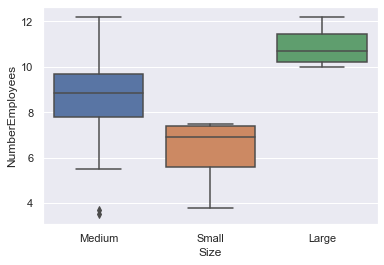

In [263]:
ax = sns.boxplot(x=DF['Size'], y=DF['NumberEmployees'].apply(np.log).round(1))

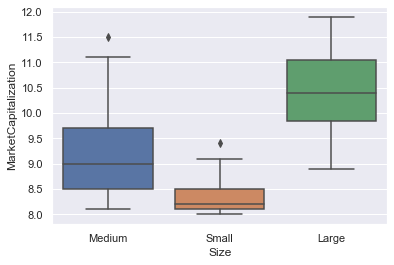

In [264]:
ax = sns.boxplot(x=DF['Size'], y=DF['MarketCapitalization'].apply(np.log).round(1))

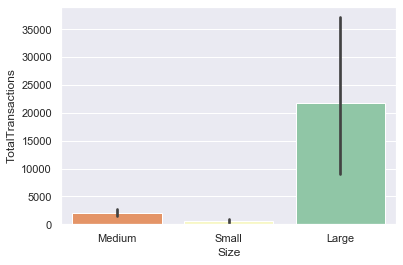

In [265]:
sns.barplot(x='Size',y='TotalTransactions', data=DF, palette='Spectral')

In [266]:
DF['Size'].unique()

array(['Medium', 'Small', 'Large'], dtype=object)

In [267]:
DF.shape[0]

132

In [268]:
DF=DF[['TotalAssets', 'NumberEmployees', 'MarketCapitalization', 'TotalTransactions','AverageTransactions']]
DF.head()

,TotalAssets,NumberEmployees,MarketCapitalization,TotalTransactions,AverageTransactions
Ticker,,,,,
NYSE:AEM,10715.5,5990.0,15892.5,1607.4,401.8
TSX:AC,19197.0,32600.0,11338.6,200.0,200.0
TSX:AGI,4455.5,1700.0,3151.9,340.1,170.1
TSX:AQN,12811.6,2277.0,8000.0,2973.6,495.6
TSX:ATD.B,30426.3,133000.0,47281.4,8481.1,848.1


In [269]:
DF_log = DF.apply(np.log).round(1)
DF_log.head()

,TotalAssets,NumberEmployees,MarketCapitalization,TotalTransactions,AverageTransactions
Ticker,,,,,
NYSE:AEM,9.3,8.7,9.7,7.4,6.0
TSX:AC,9.9,10.4,9.3,5.3,5.3
TSX:AGI,8.4,7.4,8.1,5.8,5.1
TSX:AQN,9.5,7.7,9.0,8.0,6.2
TSX:ATD.B,10.3,11.8,10.8,9.0,6.7


Text(0, 0.5, 'Frequency')

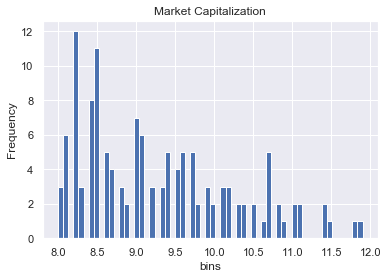

In [270]:
#DF.MarketCapitalization.plot.hist(bins=60)
plt.hist(DF_log.MarketCapitalization,bins=60)
plt.title('Market Capitalization')
plt.xlabel('bins')
plt.ylabel('Frequency')

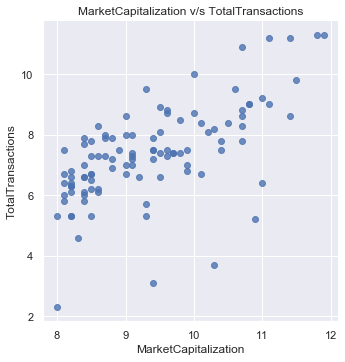

In [276]:
sns.lmplot(x='MarketCapitalization',y='TotalTransactions',data=DF_log)
plt.title('MarketCapitalization v/s TotalTransactions') # interfaces with matplotlib
plt.show()

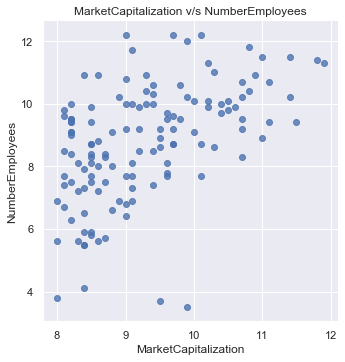

In [277]:
sns.lmplot(x='MarketCapitalization',y='NumberEmployees',data=DF_log)
plt.title('MarketCapitalization v/s NumberEmployees') # interfaces with matplotlib
plt.show()

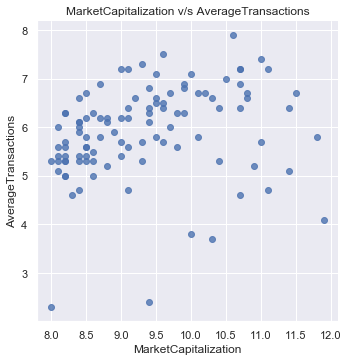

In [278]:
sns.lmplot(x='MarketCapitalization',y='AverageTransactions',data=DF_log)
plt.title('MarketCapitalization v/s AverageTransactions') # interfaces with matplotlib
plt.show()

In [279]:
DF_log.corr()

,TotalAssets,NumberEmployees,MarketCapitalization,TotalTransactions,AverageTransactions
TotalAssets,1.000000,0.487627,0.717947,0.612045,0.164255
NumberEmployees,0.487627,1.000000,0.496697,0.370067,0.215040
MarketCapitalization,0.717947,0.496697,1.000000,0.633020,0.237196
TotalTransactions,0.612045,0.370067,0.633020,1.000000,0.434729
AverageTransactions,0.164255,0.215040,0.237196,0.434729,1.000000


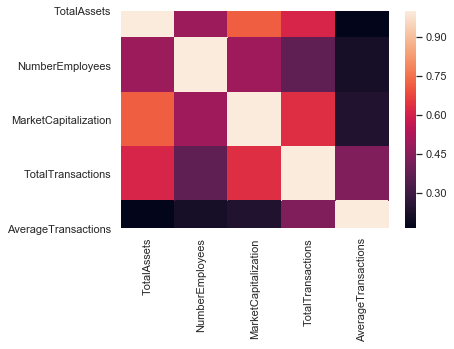

In [280]:
ax = sns.heatmap(DF_log.corr())
plt.show()

In [281]:
DF.to_csv(path+'output.csv')